In [60]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  


In [61]:
# Import Dataset 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

In [62]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
    new_data.dropna(axis=0,how='any',inplace=True) 
    return new_data
data=preprocess_data(dataset)
# classification using Decision Tree
def Classify():
  #splitting data
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
  #applying tree algorithm
  clf = tree.DecisionTreeClassifier()  
  clf.fit(x_train, y_train)   #fitting our model
  y_pred=clf.predict(x_test)   # evaluating our model
  Accurecy = accuracy_score(y_test, y_pred)
  #print("score:{}".format(accuracy_score(y_test, y_pred)))
  return clf,Accurecy,x_train, x_test, y_train, y_test
# Graphing Tree    
def G (clf):
  dot_data = tree.export_graphviz(clf, out_file=None) 
  graph = graphviz.Source(dot_data)
  graph.render("Data",format='jpg')
  return graph  

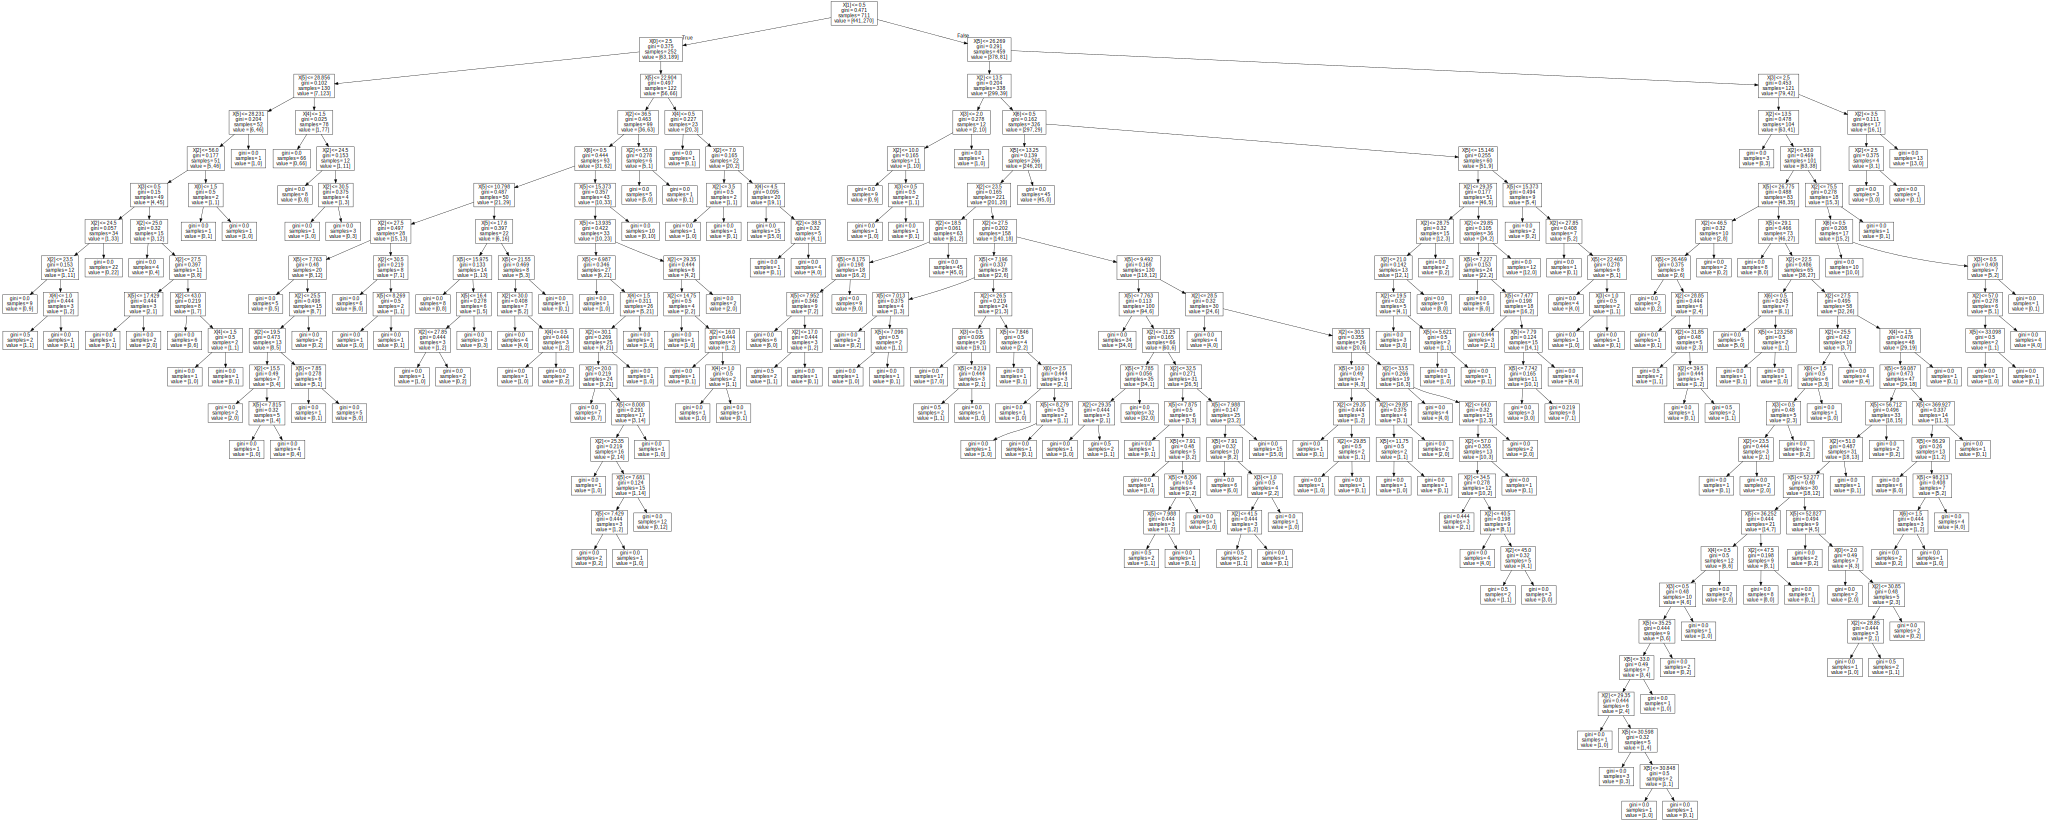

In [63]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
clf , Accurecy1,x_train, x_test, y_train, y_test= Classify()
G(clf) 
graph

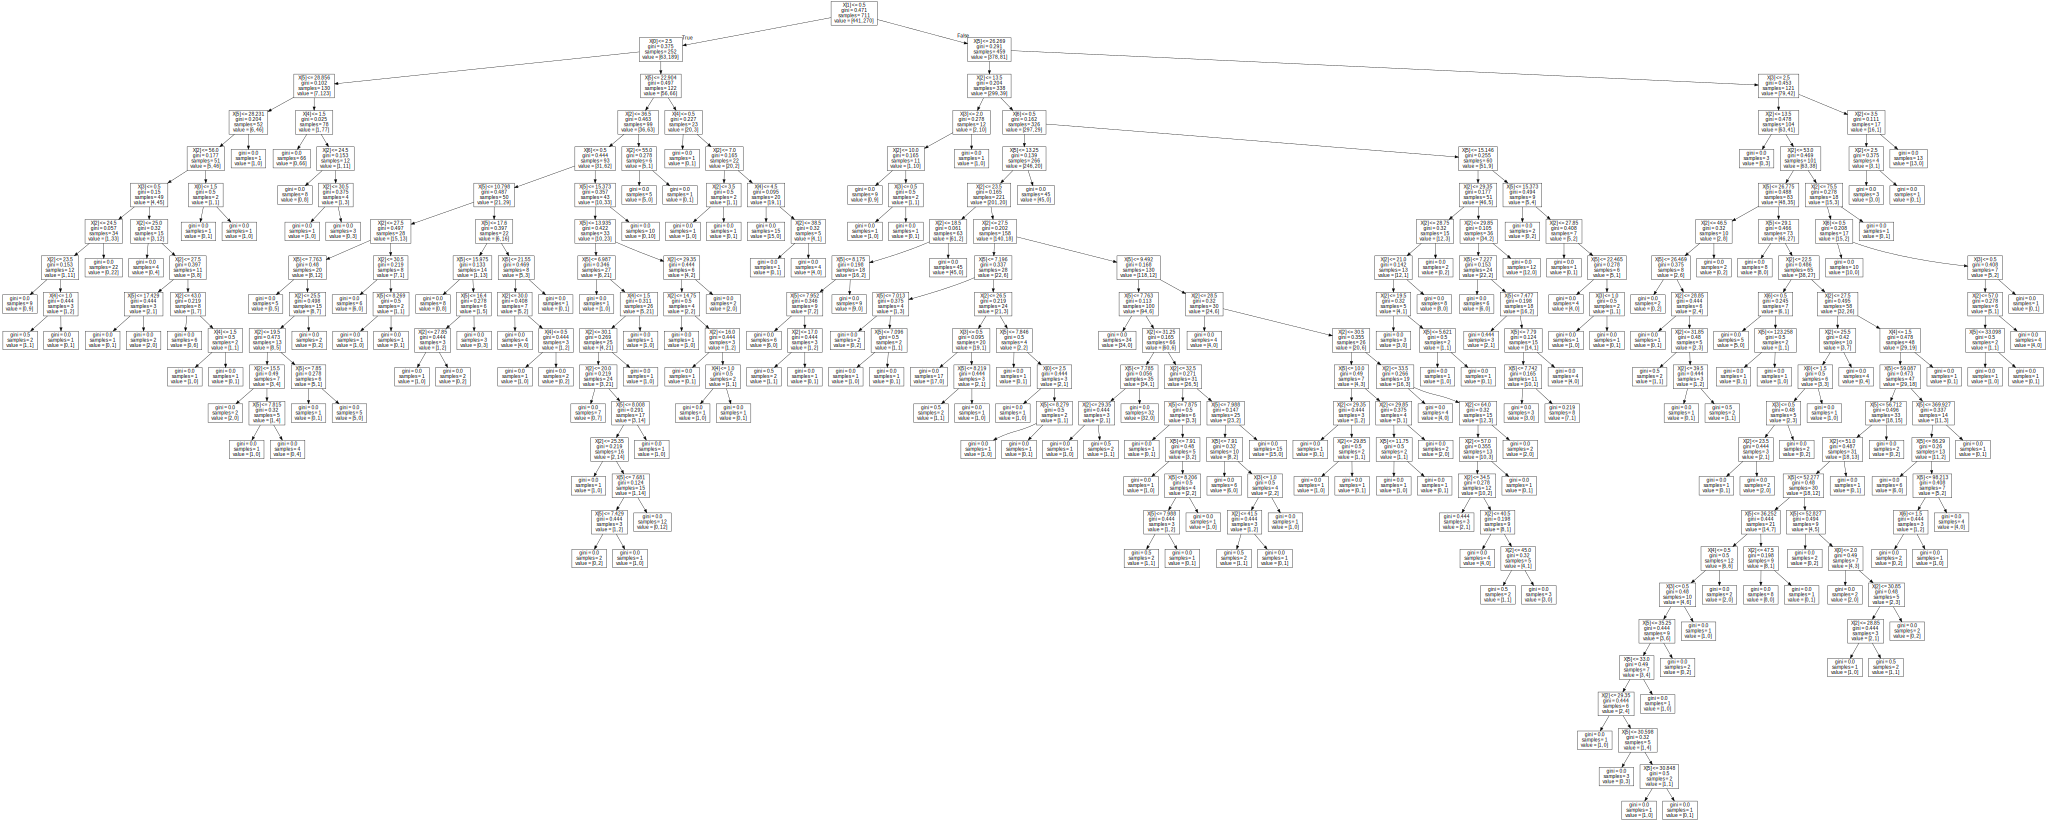

In [64]:
# Change dataset parameters 
x=data.drop(["Survived", "Name", "Cabin", "Ticket","PassengerId"], axis=1)
y= data["Survived"]
clf , Accurecy2,x_train, x_test, y_train, y_test= Classify()
G(clf)
graph

In [43]:
# print accurecies
print ("Accurecy 1 = ",Accurecy1)
print ("Accurecy 2 = ",Accurecy2)

Accurecy 1 =  0.7696629213483146
Accurecy 2 =  0.8258426966292135


In [56]:
# Random Forest Model
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)   #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7921348314606742


In [57]:
# Change n_estimators
clf=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)   #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8089887640449438


From Previous rainforest models we can note that the accurecy has been increaed when we increse the number of estimators